In [ ]:
#Approach 1
"""
Here we are Training and classifying data based on the 7 features corresponding to the 7 WiFi routers from the data set. 
"""

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
np.random.seed(seed=42)       #Citation - scipy.org numpy documentation

In [ ]:
#Read Training data
df = pd.read_csv('D_Train1.csv')            #Citation - pandas API reference documentation
X = df.drop(columns = ['Location'])         #Citation - pandas API reference documentation
y = df['Location']

In [ ]:
#Split arrays or matrices into random train and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 0,stratify=y)   #Citation - scikit-learn.org sklearn API reference documentation

In [ ]:
#Standardization of the Dataset
x_scaler = StandardScaler()                    #Citation - scikit-learn.org sklearn API reference documentation
X_train = x_scaler.fit_transform(X_train)      #Citation - scikit-learn.org sklearn API reference documentation
X_val = x_scaler.transform(X_val)              #Citation - scikit-learn.org sklearn API reference documentation        
X_train.shape

(1280, 7)

In [ ]:
#Function to plot Confusion Matrix
def plot_conf(c_mat):
    plt.figure()                    #Citation - from matplotlib.org matplotlip API reference documentation
    ax = sns.heatmap(c_mat,annot=True,fmt='d',cmap="YlGnBu")       ##Citation - seaborn.pydata.org seaborn documentation
    plt.title('Confusion Matrix')  
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [ ]:
#Baseline System Naive Bayes
nb = GaussianNB()                   #Citation - scikit-learn.org sklearn API reference documentation
nb.fit(X_train, y_train)
y_pred = nb.predict(X_val)

In [ ]:
print("Training Accuracy:", nb.score(X_train, y_train))
print("Validation Set Accuracy:", nb.score(X_val, y_val))      
cross_val = cross_val_score(nb, x_scaler.transform(X), y, cv=5)       #Citation - scikit-learn.org sklearn API reference documentation
print("Mean Cross-Validation Accuracy:", np.mean(cross_val))          #Citation - scipy.org numpy documentation
print("Standard deviation:", np.std(cross_val))

Training Accuracy: 0.98359375
Validation Set Accuracy: 0.990625
Mean Cross-Validation Accuracy: 0.9843750000000002
Standard deviation: 0.005229125165837968


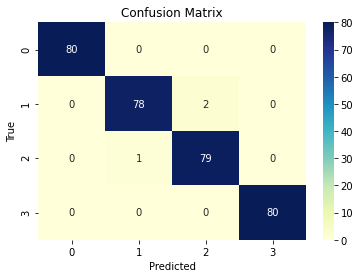

In [ ]:
#Confusion matrix for Validation Data
conf_mat = confusion_matrix(y_val, y_pred)        #Citation - scikit-learn.org sklearn API reference documentation
plot_conf(conf_mat)

In [ ]:
#Random Classifier
print("Accuracy of random classifier:", accuracy_score(y_val, np.random.choice([1, 2, 3, 4], size=y_val.shape[0])))   #Citation - scikit-learn.org sklearn API reference documentation

Accuracy of random classifier: 0.26875


In [ ]:
#Logistic Regression classifier.
c = [0.001,0.01, 0.1, 1, 10, 50, 100, 200]                       #Citation - scipy.org numpy documentation
param_grid = {'C':c}

grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5,n_jobs=-1)           #Citation - scikit-learn.org sklearn API reference documentation
grid_result = grid_search.fit(X_train,y_train)

print("The best parameter:", grid_result.best_params_)

lr = LogisticRegression(C = grid_result.best_params_['C'], penalty = 'l2',       
                        solver='lbfgs',multi_class='multinomial')          #Citation - scikit-learn.org sklearn API reference documentation
lr_fit = lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

The best parameter: {'C': 50}


In [ ]:
print("Training Accuracy:", lr.score(X_train, y_train))
print("Validation Accuracy:", lr.score(X_val, y_val))
cross_val = cross_val_score(lr, x_scaler.transform(X), y, cv=5)                       #Citation - scikit-learn.org sklearn API reference documentation
print("Mean Cross-Validation Accuracy:", np.mean(cross_val))                         
print("Standard deviation:", np.std(cross_val))

Training Accuracy: 0.984375
Validation Accuracy: 0.990625
Mean Cross-Validation Accuracy: 0.9806250000000001
Standard deviation: 0.007756046028744283


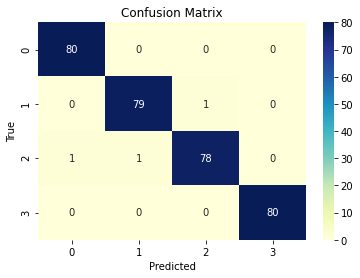

In [ ]:
#Confusion matrix for Validation Data
conf_mat = confusion_matrix(y_val, y_pred)                      #Citation - scikit-learn.org sklearn API reference documentation
plot_conf(conf_mat)

In [ ]:
#SVM classifier
c = [0.01, 0.1, 1, 10, 50, 100, 200]
gamma = [0.001, 0.01, 0.1, 1, 10]

param_grid = {'C':c, 'gamma':gamma}

grid_search = GridSearchCV(SVC(),param_grid,cv=5,n_jobs=-1)                                 #Citation - scikit-learn.org sklearn API reference documentation
grid_result = grid_search.fit(X_train,y_train)

print("The best parameters:", grid_result.best_params_)

svc = SVC(kernel = 'rbf', C = grid_result.best_params_['C'],                      #Citation - scikit-learn.org sklearn API reference documentation
          gamma = grid_result.best_params_['gamma'], probability=True)  
svc.fit(X_train,y_train)
y_pred = svc.predict(X_val)

The best parameters: {'C': 50, 'gamma': 0.1}


In [ ]:
print("Training Accuracy:", svc.score(X_train, y_train))
print("Validation Accuracy:", svc.score(X_val, y_val))
cross_val = cross_val_score(svc, x_scaler.transform(X), y, cv=5)
print("Mean Cross-Validation Accuracy:", np.mean(cross_val))
print("Standard deviation:", np.std(cross_val))

Training Accuracy: 0.99453125
Validation Accuracy: 0.975
Mean Cross-Validation Accuracy: 0.9806250000000001
Standard deviation: 0.0077560460287442665


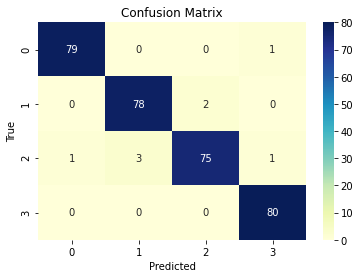

In [ ]:
#Confusion matrix for Validation Data
conf_mat = confusion_matrix(y_val, y_pred)                      #Citation - scikit-learn.org sklearn API reference documentation
plot_conf(conf_mat)

In [ ]:
#XGB Classififer
rates = [0.01,0.05,0.1,0.15,0.2]
n = [10, 50, 100, 200]
depth_values = range(1,20,1)

param_grid  = {'learning_rate':rates,'n_estimators':n, 'max_depth':depth_values, 'random_state':[0]} 

grid_search = GridSearchCV(XGBClassifier(),param_grid,cv=5,n_jobs=-1)                             #Citation - scikit-learn.org sklearn API reference documentation
grid_result = grid_search.fit(X_train,y_train)

print("The best parameters:",grid_result.best_params_)
xgb = XGBClassifier(n_estimators=grid_result.best_params_['n_estimators'],                      #Citation - scikit-learn.org sklearn API reference documentation
                                learning_rate = grid_result.best_params_['learning_rate'],
                                max_depth = grid_result.best_params_['max_depth'],
                                objective='multi:softmax', n_jobs = -1, random_state=0)

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_val)

The best parameters: {'learning_rate': 0.2, 'max_depth': 1, 'n_estimators': 200, 'random_state': 0}


In [ ]:
print("Training Accuracy:", xgb.score(X_train, y_train))
print("Validation Accuracy:", xgb.score(X_val, y_val))
cross_val = cross_val_score(xgb, x_scaler.transform(X), y, cv=5)
print("Mean Cross-Validation Accuracy:", np.mean(cross_val))
print("Standard deviation:", np.std(cross_val))

Training Accuracy: 0.99609375
Validation Accuracy: 0.990625
Mean Cross-Validation Accuracy: 0.984375
Standard deviation: 0.0034232659844072966


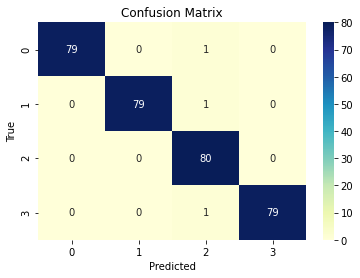

In [ ]:
#Confusion matrix for Validation Data
conf_mat = confusion_matrix(y_val, y_pred)                #Citation - scikit-learn.org sklearn API reference documentation
plot_conf(conf_mat)

In [ ]:
#KNN Classifier
k = list(range(1,11))
weights = ['uniform','distance']

param_grid = {'n_neighbors':k,'weights': weights}
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,n_jobs=-1)             #Citation - scikit-learn.org sklearn API reference documentation
grid_result = grid_search.fit(X_train,y_train)

print("The best parameters:", grid_result.best_params_)

knn = KNeighborsClassifier(n_neighbors = grid_result.best_params_['n_neighbors'],             #Citation - scikit-learn.org sklearn API reference documentation
                           weights = grid_result.best_params_['weights'], n_jobs = -1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)

The best parameters: {'n_neighbors': 4, 'weights': 'distance'}


In [ ]:
print("Training Accuracy:", knn.score(X_train, y_train))
print("Validation Accuracy:", knn.score(X_val, y_val))
cross_val = cross_val_score(knn, x_scaler.transform(X), y, cv=5)
print("Mean Cross-Validation Accuracy:", np.mean(cross_val))
print("Standard deviation:", np.std(cross_val))

Training Accuracy: 1.0
Validation Accuracy: 0.9875
Mean Cross-Validation Accuracy: 0.9868750000000001
Standard deviation: 0.007500000000000003


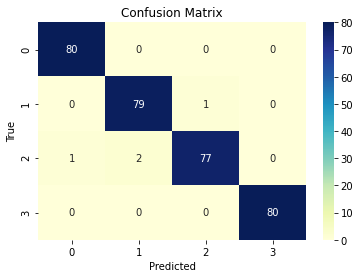

In [ ]:
#Confusion matrix for Validation Data
conf_mat = confusion_matrix(y_val, y_pred)
plot_conf(conf_mat)

In [ ]:
#Random Forest Classifier
max_depth = list(range(1,20,1))
n = [10, 50, 100, 200]

param_grid = {'max_depth':max_depth,'n_estimators':n,'random_state':[0]}          
grid_search = GridSearchCV(RandomForestClassifier(),param_grid,cv=5,n_jobs=-1)                   #Citation - scikit-learn.org sklearn API reference documentation
grid_result = grid_search.fit(X_train,y_train)

print("The best parameters:",grid_result.best_params_)

rf = RandomForestClassifier(n_estimators = grid_result.best_params_['n_estimators'],      #Citation - scikit-learn.org sklearn API reference documentation
                            max_depth = grid_result.best_params_['max_depth'],
                            n_jobs = -1, random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)

The best parameters: {'max_depth': 10, 'n_estimators': 50, 'random_state': 0}


In [ ]:
print("Training Accuracy:", rf.score(X_train, y_train))
print("Validation Data Accuracy:", rf.score(X_val, y_val))
cross_val = cross_val_score(rf, x_scaler.transform(X), y, cv=5)
print("Mean Cross-Validation Accuracy:", np.mean(cross_val))
print("Standard deviation:", np.std(cross_val))

Training Accuracy: 0.9984375
Validation Data Accuracy: 0.990625
Mean Cross-Validation Accuracy: 0.9825000000000002
Standard deviation: 0.0050775240028974955


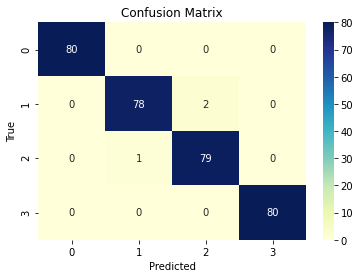

In [ ]:
#Confusion matrix for Validation Data
conf_mat = confusion_matrix(y_val, y_pred)
plot_conf(conf_mat)

In [ ]:
#MLP Classifier
alpha = 10.0 ** -np.arange(1, 10)
max_iter = [800,1000,1500]

param_grid = {'alpha':alpha,'max_iter':max_iter,'random_state':[0]}          
grid_search = GridSearchCV(MLPClassifier(),param_grid,cv=5)                   #Citation - scikit-learn.org sklearn API reference documentation
grid_result = grid_search.fit(X_train,y_train)

print("The best parameters:",grid_result.best_params_)

mlp = MLPClassifier(alpha = grid_result.best_params_['alpha'],                    #Citation - scikit-learn.org sklearn API reference documentation
                    max_iter = grid_result.best_params_['max_iter'],random_state=0)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_val)

The best parameters: {'alpha': 0.01, 'max_iter': 800, 'random_state': 0}


In [ ]:
print("Training Accuracy:", mlp.score(X_train, y_train))
print("Validation Accuracy:", mlp.score(X_val, y_val))
cross_val = cross_val_score(mlp, x_scaler.transform(X), y, cv=5)
print("Mean Cross-Validation Accuracy:", np.mean(cross_val))
print("Standard deviation:", np.std(cross_val))

Training Accuracy: 0.990625
Validation Accuracy: 0.99375
Mean Cross-Validation Accuracy: 0.984375
Standard deviation: 0.006846531968814593


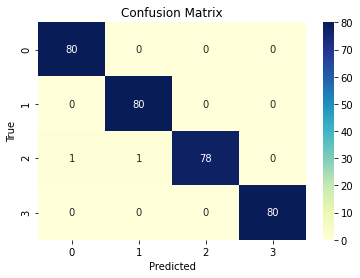

In [ ]:
#Confusion matrix for Validation Data
conf_mat = confusion_matrix(y_val, y_pred)
plot_conf(conf_mat)

In [ ]:
#Read Test data
df_test = pd.read_csv('D_Test1.csv')                 
X_test = df_test.drop(columns = ['Location'])        
y_test = df_test['Location']

In [ ]:
X_test = x_scaler.transform(X_test)   

In [ ]:
print("Test Accuracy:" , knn.score(X_test,y_test))

Test Accuracy: 0.9825


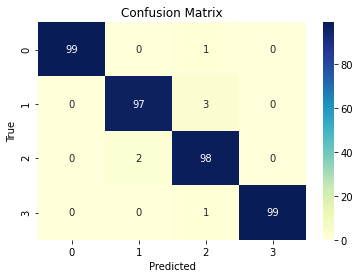

In [ ]:
#Confusion Matrix for Test Data
y_pred = knn.predict(X_test)
conf_test = confusion_matrix(y_test, y_pred)           #Citation - scikit-learn.org sklearn API reference documentation
plot_conf(conf_test)